<a href="https://colab.research.google.com/github/manishramamoorthy/New-Machine-Learning-Projects/blob/main/Project_6_Gold_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


**Summary :**

1) Importing Libraries                     
2) Loading Dataset                          
3) Data PreProcessing                               
4) EDA (Exploratory Data Analysis)                           
5) Train and Test Split                                 
6) Standard Scaler                          
7) Modelling                             
8) Making Prediction                                
9) Compare Actual and Predicted Scores                                
10) Evaluation Metrics                                         

**1) Importing Libraries**

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import sklearn.datasets
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

**2) Loading Dataset**

In [2]:
gld_data = pd.read_csv("/content/gld_price_data.csv")

**3) Data PreProcessing**

1) Top Five Rows of DataSet

In [3]:
gld_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


2) Last Five Rows of DataSet

In [4]:
gld_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


3) Shape of DataSet

In [5]:
gld_data.shape
print("Number of Rows: ",gld_data.shape[0])
print("Number of Columns: ",gld_data.shape[1])

Number of Rows:  2290
Number of Columns:  6


4) data Types

In [6]:
gld_data.dtypes

Date        object
SPX        float64
GLD        float64
USO        float64
SLV        float64
EUR/USD    float64
dtype: object

5) Getting Information of DataSet

In [7]:
gld_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


6) Checking Missing Values of DataSet

In [8]:
gld_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

7) Droping Duplicates Values of Dataset

In [9]:
gld_data = gld_data.drop_duplicates()

8) Statistical Measures

In [10]:
gld_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


10) IQR (Inter Quantile Range)

    IQR = Q3-Q1           
    Upper Threshold = Q3 + (1.5 * IQR)
    Lower Threshold = Q1 - (1.5 * IQR)   

SPX ->  Silver Spot 

In [11]:
IQR = gld_data.SPX.quantile(0.75) - gld_data.SPX.quantile(0.25)
Upper_Threshold = gld_data.SPX.quantile(0.75) + (1.5 * IQR)
Lower_Threshold = gld_data.SPX.quantile(0.25) - (1.5 * IQR)
print("Upper_Threshold : ",Upper_Threshold)
print("Lower_Threshold : ",Lower_Threshold)

Upper_Threshold :  3322.712722375
Lower_Threshold :  -9.827682624999852


USO	

In [12]:
IQR = gld_data.USO.quantile(0.75) - gld_data.USO.quantile(0.25)
Upper_Threshold = gld_data.USO.quantile(0.75) + (1.5 * IQR)
Lower_Threshold = gld_data.USO.quantile(0.25) - (1.5 * IQR)
print("Upper_Threshold : ",Upper_Threshold)
print("Lower_Threshold : ",Lower_Threshold)

Upper_Threshold :  72.99875374999999
Lower_Threshold :  -20.791252249999992


SLV

In [13]:
IQR = gld_data.SLV.quantile(0.75) - gld_data.SLV.quantile(0.25)
Upper_Threshold = gld_data.SLV.quantile(0.75) + (1.5 * IQR)
Lower_Threshold = gld_data.SLV.quantile(0.25) - (1.5 * IQR)
print("Upper_Threshold : ",Upper_Threshold)
print("Lower_Threshold : ",Lower_Threshold)

Upper_Threshold :  33.85124875
Lower_Threshold :  4.601250749999998


**4) EDA (Exploratory Data Analysis)**

SLV

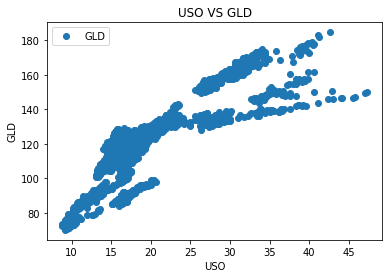

In [14]:
gld_data.plot(x="SLV",y="GLD",style="o")
plt.title("USO VS GLD")
plt.xlabel("USO")
plt.ylabel("GLD")
plt.show()

EUR/USD

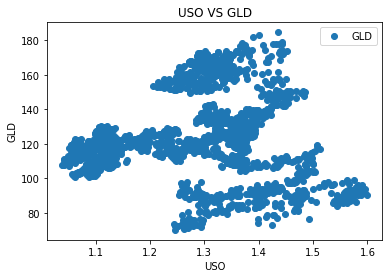

In [15]:
gld_data.plot(x="EUR/USD",y="GLD",style="o")
plt.title("USO VS GLD")
plt.xlabel("USO")
plt.ylabel("GLD")
plt.show()

**5) Train and Test Split**

In [16]:
del gld_data["Date"]

In [17]:
X = gld_data.drop(columns="GLD",axis=1)
y = gld_data["GLD"]

In [18]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=7)

**6) Standard Scaler**

In [19]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit_transform(X_train)
scaler.transform(X_test)

array([[ 0.55120003, -1.12470636, -0.91100381, -1.42834991],
       [ 0.85820907, -0.85231429, -0.86032652, -1.45403107],
       [-0.86244496,  0.21953336,  1.11186469,  0.1639198 ],
       ...,
       [-0.53187188,  3.39811599, -0.48151361,  2.09890824],
       [ 0.46734974,  0.2392792 , -0.18040602,  0.70962355],
       [ 1.76805942, -1.06293716, -0.58441681, -0.92216496]])

**7) Modelling**

1) Random Forest Regressor

In [20]:
from sklearn.ensemble import RandomForestRegressor
ran_fore = RandomForestRegressor()
ran_fore.fit(X_train,y_train)

RandomForestRegressor()

**8) Making Prediction**

Random Forest Regressor

In [21]:
ran_fore.predict([[1447.160034,77.309998,15.180,1.557099]])

array([85.45099982])

**9) Compare Actual and Predicted Scores**

In [22]:
y_pred = ran_fore.predict(X_test)
y_pred

array([106.5408014 , 104.55969933, 146.57460175, 116.89930046,
       155.3939007 , 126.89550098, 147.07550357, 147.24520004,
       121.85469956, 121.67079875, 118.83150112, 133.09880042,
        85.23469977,  92.4735008 , 119.90700082, 163.3662985 ,
       118.87450151, 116.00440018, 125.09849926, 106.81400022,
       161.02680095, 122.82290004, 161.94369801, 122.96699923,
       120.25640011, 169.45129772, 139.66530212, 120.50860004,
        92.86910005, 121.47330022,  94.19120175, 159.72719838,
       113.98490002, 150.0717014 ,  94.93669955, 156.29299813,
       117.93989861, 105.22940112, 120.90189985, 142.97969766,
       159.80200215,  80.36270109, 114.73619983, 101.92009922,
        90.57560029, 175.91300154, 125.36430034,  89.6275013 ,
       109.00149814, 129.06820242, 127.50350116, 129.25390097,
        89.43949982, 120.69489981, 140.9625012 , 153.73819949,
       122.9431988 , 127.56960049, 125.63850009,  96.76339915,
       119.73619999, 125.3818996 , 124.46579887, 108.30

In [23]:
df = pd.DataFrame({"Actual": y_test,"Prediction" :y_pred})
df

,Actual,Prediction
1782,106.949997,106.540801
1673,103.930000,104.559699
868,154.869995,146.574602
2035,116.730003,116.899300
961,154.770004,155.393901
...,...,...
1909,124.779999,125.186000
858,167.320007,157.800900
95,86.650002,87.651100
1401,124.940002,124.215299


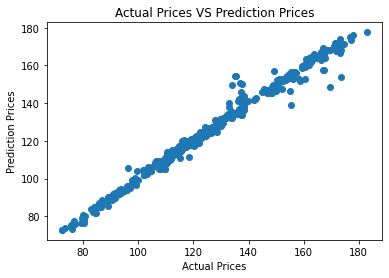

In [24]:
plt.scatter(y_test,y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Prediction Prices")
plt.title("Actual Prices VS Prediction Prices")
plt.show()

**10) Evaluation Metrics**

In [25]:
from sklearn import metrics
print("R2-Scores: ",metrics.r2_score(y_test,y_pred))

R2-Scores:  0.9851038223749872
